# Linear Regression

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [15]:
# Encoding Categorial Data
encoder = LabelEncoder()
encoder.fit(df.sex.drop_duplicates())
df.sex = encoder.transform(df.sex)
encoder.fit(df.smoker.drop_duplicates()) 
df.smoker = encoder.transform(df.smoker)
encoder.fit(df.region.drop_duplicates()) 
df.region = encoder.transform(df.region)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


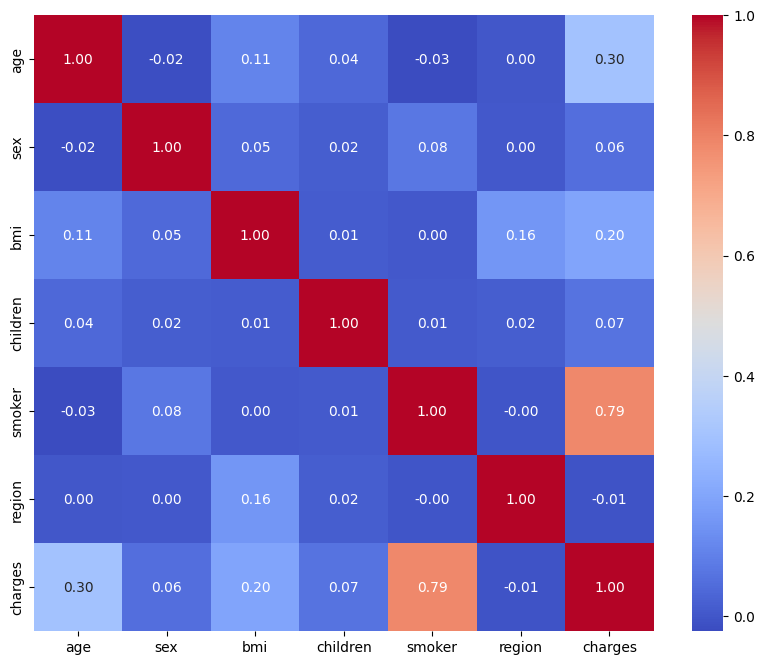

In [26]:
corr = df.corr()
plt.figure(figsize=(10,8)) # Optional: Adjust the figure size
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [31]:
X = df.iloc[:,:3]
y = df.iloc[:,-1]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)
# Predict on the testing data
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('the mean square error is: ', mse)
print('The r2 score is:' , r2)

the mean square error is:  125825189.07894577
The r2 score is: 0.14138671044584883


the above r2 and MSE indicate that this data is not suitable for linear regression